In [1]:
%reset -f
from CTR import *
import matplotlib.pyplot as plt

 CTR v2


---

In [2]:

import json
import traceback
import pandas as pd
import numpy as np
import itertools

################################################################################################################

pi   = np.pi
inf  = np.inf
#
exp  = lambda x: np.exp(x)
#
def asin(x):
	x = np.round(x, 10)
	return np.arcsin(x)
#
vec  = lambda *args: np.array(args)
unit = lambda *args: vec(*args)/norm(vec(*args))
span = lambda eval, evec : np.tensordot(eval, evec, axes=0)
#
def norm(v):
	if len(v.shape)>1:
		return np.linalg.norm(v, axis=1)
	else: return np.linalg.norm(v)
def Crit(v):
	n = np.where(v==0, 1, v)
	v = np.where(v==0, 0, 1/n)
	v[(np.where(v==0)[0]+1)%3] *= -1
	return v
def Orthogonal(v):
	z = np.count_nonzero(v)
	if z==1:
		M = vec([0, 1, 0], [0, 0, 1], [1, 0, 0])
		return M@v, M@M@v
	if z==2: o = Crit(v)
	if z==3: o = Crit(vec(*v[0:2], 0))
	return (o, np.cross(v, o))

################################################################################################################



In [3]:
# class Sample():
# 	def __init__(self, *film, nref):
# 		self.film = film
# 		self.nref = nref
# 	def __truediv__(self, substrate):
# 		# Sample/Sample
# 		if 'Sample' in str(substrate.__class__):
# 			return Sample(*self.film, *substrate.film, nref=substrate.nref)
# 		else:	# Sample/Film
# 			return Sample(*self.film, substrate, nref=None)
# 	# def __or__(self, xray): return self.I(xray.q, xray.Energy)
# 	def __or__(self, xray):
# 		I = xray.I(self)
# 		return I/np.max(I)

# 	#
# 	def F(self, Q, E):
# 		F = np.zeros_like(Q).astype(dtype=complex)
# 		PHI = np.zeros_like(Q).astype(dtype=complex)
# 		for film in self.film:
# 			expNIX = np.prod(exp(PHI), axis=1)
# 			F += (expNIX * film.F(Q, E))
# 			Noinf = np.where(film.N==inf, 0, film.N)
# 			# Noinf = np.where(film.N==-inf, 0, Noinf)
# 			IX = 1j *  Q @ film.molecule.map
# 			PHI += IX * (Noinf * self.nref)
# 		return vec(*F)
# 	#
# 	def I(self, Q, E=Xray().Energy): return np.abs(self.F(Q, E)) ** 2


In [4]:
# Q = vec([0,0,1], [0,0,2])
# E = XRD.Energy
# F = np.zeros(len(Q)).astype(dtype=complex)
# PHI = np.zeros_like(Q).astype(dtype=complex)
# # print(F)
# for film in T1.film:
#     # print(film)
# 	expNIX = np.prod(exp(PHI), axis=1)
# 	# print(expNIX)
# 	# print(film.F(Q, E))
# 	F += (expNIX * film.F(Q, E))
# # 	Noinf = np.where(film.N==inf, 0, film.N)
# # 	# Noinf = np.where(film.N==-inf, 0, Noinf)
# # 	IX = 1j *  Q @ film.molecule.map
# # 	PHI += IX * (Noinf * T1.nref)

In [5]:
# STO1 = Film(sto, (1,1,1))
# STO2 = Film(sto, (1,1,2))
# # plt.plot(STO1|XRD)
# plt.plot(STO1/STO1(0,0,1)|XRD)
# plt.plot(STO2|XRD)

---

In [6]:
from CTR.Atoms import Sr, Ti, O, Ir

In [7]:
XRD = Xray()
XRD.Q(0,0,1)

array([[0.        , 0.        , 0.0081568 ],
       [0.        , 0.        , 0.01631361],
       [0.        , 0.        , 0.02447041],
       ...,
       [0.        , 0.        , 8.14048934],
       [0.        , 0.        , 8.14864614],
       [0.        , 0.        , 8.15680294]])

In [8]:
sto = Perovskite(abc=(3.905, 3.905, 3.905), ABO=(Sr, Ti, O))
# sio = Perovskite(abc=Molecule.pseudocubic(5.64, 5.69, 7.94), ABO=(Sr, Ir, O))

test = Molecule(lattice=(3.905, 3.905, 3.905, 90, 90, 120), structure=sto.structure)
# test2 = Perovskite(abc=(3.905, 3.905, 3.905*np.sqrt(3)/2), ABO=(Sr, Ti, O))

#
STO = Film(sto, (10,10,10))
BULK = Film(sto, (10,10,inf))
TEST = Film(test, (10,10,10))

T1 = STO/STO(0,0,1)
T2 = Film(sto, (10,10,20))

In [9]:
test.rmap

array([[ 1.60901032,  0.        ,  0.        ],
       [ 0.92896254,  1.85792509, -0.        ],
       [-0.        ,  0.        ,  1.60901032]])

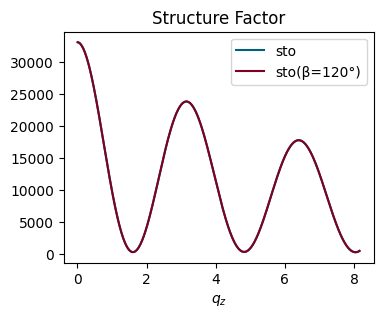

In [10]:
plt.close()
plt.figure(figsize=(4,3))
plt.title('Structure Factor')
plt.plot(XRD.qz, np.abs(XRD.SF(sto))**2, label='sto', color='#006080')
plt.plot(XRD.qz, np.abs(XRD.SF(test))**2, label='sto(β=120°)', color='#800020')
plt.xlabel('$q_z$')
plt.legend()

In [11]:
print(sto.map)
print(test.map)

[[3.905 0.    0.   ]
 [0.    3.905 0.   ]
 [0.    0.    3.905]]
[[ 3.905     -1.9525     0.       ]
 [ 0.         3.3818292  0.       ]
 [ 0.         0.         3.905    ]]


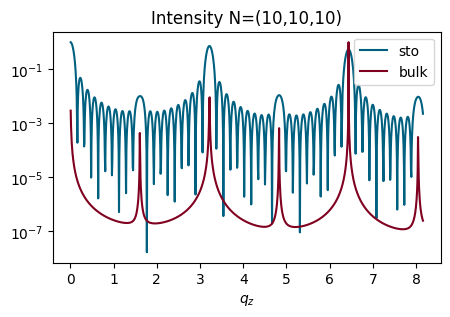

In [12]:
plt.close()
plt.figure(figsize=(5,3))
plt.title('Intensity N=(10,10,10)')
plt.semilogy(XRD.qz, STO|XRD, label='sto', color='#006080')
plt.semilogy(XRD.qz, BULK|XRD, label='bulk', color='#800020')

# plt.plot(XRD.qz, TEST|XRD, label='sto(β=120°)', color='#800020')
# plt.xlim([0.2, 8])
plt.xlabel('$q_z$')
plt.legend()

In [13]:
bcc = BCC(abc=(3,3,3), AB=(O, O))
fcc = FCC(abc=(3,3,3), X=O)
sc  = SC(abc=(3,3,3), X=O)
BCC = Film(bcc, (1,1,inf))
FCC = Film(fcc, (1,1,inf))
SC = Film(sc, (1,1,inf))

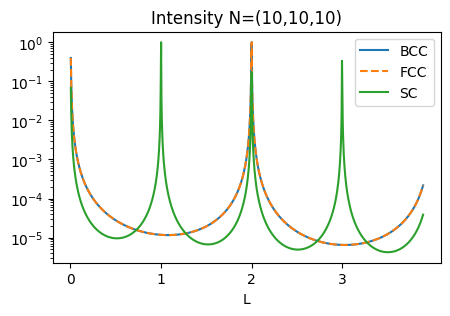

In [16]:
plt.close()
plt.figure(figsize=(5,3))
plt.title('Intensity N=(10,10,10)')
plt.semilogy(XRD.HKL(sc)[:,2], BCC|XRD, label='BCC')
plt.semilogy(XRD.HKL(sc)[:,2], FCC|XRD, label='FCC', linestyle='--')
plt.semilogy(XRD.HKL(sc)[:,2], SC|XRD, label='SC')
# plt.plot(XRD.qz, TEST|XRD, label='sto(β=120°)', color='#800020')
# plt.xlim([0.2, 8])
# plt.xlabel('$q_z$')
plt.xlabel('L')
plt.xticks(range(4))
plt.legend()
